In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
import NPL_exante as NPL
from model_zucher_exante import zurcher
from Solve_NFXP import solve_NFXP
from estimate_NFXP import estimate as NFXP_estimate

C:\Users\sofie\AppData\Local\Temp\ipykernel_2904\3439240256.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Problem set 5

#### 1. Look at the ReadMe.txt to get an overview of the code

#### 2.What is the difference between $EV(x,a)$ and $V_{\sigma}(x)$? 
$EV(x,a)$ is expected value function, $V_{\sigma}(x)$ is integrated value function, obviously. 

#### 3. Write the formula for $P=\Lambda(V_{\sigma})$, $V_{\sigma}=\psi(P)$ and $P=\Psi(P)$, exploiting the extreme value type I distribution on $\epsilon$. 
Hint: what is $e(a,P)\equiv E[\epsilon(a)|x,a]$ under this distributional assumption? 

Insert the found formulars under model_zucher_exante.psi ($V_{\sigma}=\psi(P)$) and model_zucher_exante.lambdaa ( $P=\Lambda(V_{\sigma})$)

$P=\Lambda(V_{\sigma})$ ccp as a function of value function:
$$
P(a|x) = \int \mathbb{I}[a=\arg \max_{j\in\mathcal{A}}(v(j,x)+\epsilon(j))]g(\epsilon|x)d\epsilon
$$
where $v(x,a)=u(x,a)+\beta\sum_{x'}V_{\sigma}(x')f(x'|x,a)$ is choice specific value function. 


Using EV1 distribution:
$P(a|x) = \frac{1}{1+\sum_{j\neq a}\exp[v(x,j)-v(x,a)]/\sigma} $

$V_{\sigma} = \psi(P)$ Integrated value fct as function of choice probabilities. Inverse of $\Lambda(V_{\sigma})$:
$$
V_{\sigma} = \psi(P) = [\mathbf{I}-\beta F^U(P)]^{-1}\sum_{a\in A}[P(a)*[u(a)+e(a,P)]]
$$

$F^U(P) = \sum_{a\in A}P(a)F(a)$ is unconditional transition probability.

$e(a,P) = \mathbb{E}[\epsilon(a)|x,a]$ is expectation of $\epsilon$ conditional on a being optimal.

$P=\Psi(P)$ is fixed point in ccp space :)

$P = \Psi(P) = \Lambda(\psi(P))$

#### 4. Solve the model using NPL, and plot the convergence of psi to check that your results are correct

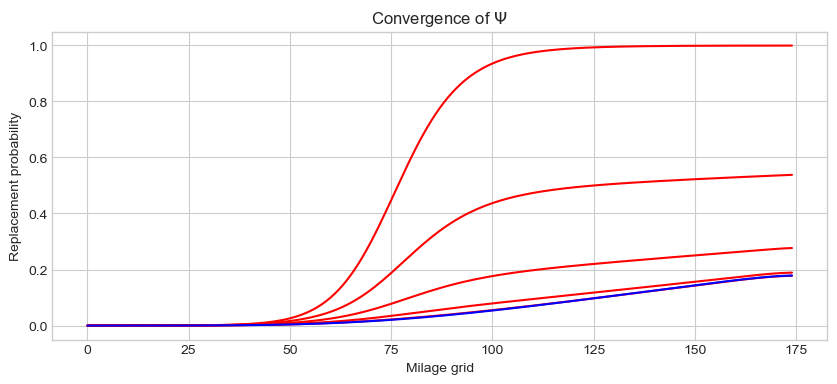

In [5]:
# SETUP
model = zurcher()

# SOLVE THE MODEL
pk_NPL = NPL.solve(model)

fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,1,1)

ax.set_title(f'Convergence of $\Psi$')
ax.set_xlabel('Milage grid')
ax.set_ylabel('Replacement probability')
for i in range(5):
    ax.plot(model.grid,1-pk_NPL[i+1,:],color = 'red')
ax.plot(model.grid,1-pk_NPL[99,:],color = 'blue')
plt.show()

#### 5. Now you have to compare NFXP and NPL. Remeber that NFXP solve the fixed-point problem in value function space ( EV = Γ( EV ) ) and NPL solves it in CCP space ( pk = Ψ( pk ) ). Calculate the CCPs from either method and compare the results

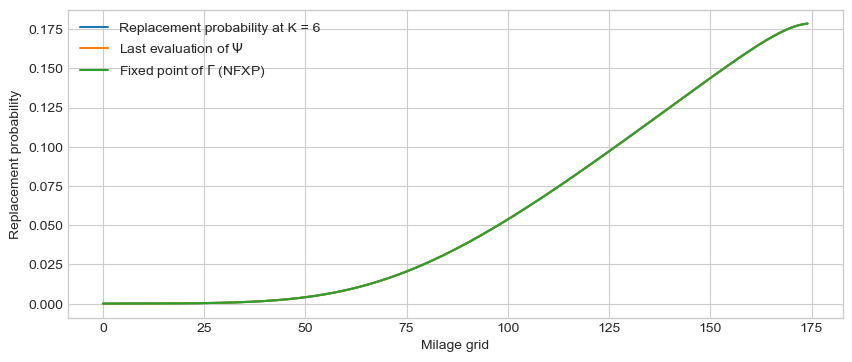

In [9]:
# solve the model with NFXP
ev0 = np.zeros(model.n)
solver_NFXP = solve_NFXP()
_, pk_NFXP = solver_NFXP.poly(model.bellman, ev0, beta=model.beta, output=2)


# Define figure
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,1,1)



ax.plot(model.grid,1-pk_NPL[6,:],label=f'Replacement probability at K = 6')
ax.plot(model.grid,1-pk_NPL[99,:],label=f'Last evaluation of $\Psi$')
ax.plot(model.grid,1-pk_NFXP,label=f'Fixed point of $\Gamma$ (NFXP)')

ax.set_xlabel('Milage grid')
ax.set_ylabel('Replacement probability')
plt.legend()

plt.show()

#### 6. $F^{U}(pk)$ is the unconditional transition probabilities induced by pk (vector) - what does that mean? 
(a) Try changing the number of gridpoints to 5 and the transition probability vector to a scalar of 0.65, place a debugger (alternatively print statement) in the model_zucher_exante.psi.py-function and compare Fu and P1. What is the difference between the two? 

#### 7. What determines if NFXP is computationally cheaper to use than NPL? Think about what is in the inner loop of either algorithm. 

#### 8. Now we have to Estimate the model using NPL. In order to estimate the model you should understand 
<il type ="a">
<li> NPL.estimate </li>
<li> NPL.ll (skip the part of computing the gradient and the Hessian)</li>
</il>

#### 7. Fill in the missing stuff in NPL.ll, and run the code below to check that your results are correct

In [ ]:
 # ESTIMATE
# setup
Kmax=10  # Max number of outer loop iterations for NPL 
pnames = ['RC','c']
model = zurcher()

# Load data
data = model.read_busdata(bustypes=[1,2,3,4])
data_class = NPL.setup_data(data)
samplesize = data_class.x.size

#Estimate using NPL
import time
t0 = time.time()
res, theta_hat,pk = NPL.estimate(model, data_class, Kmax)
t1 = time.time()

# Print the results
print(f'Structual estimation using busdata from Rust(1987)')
print(f'Beta        = {model.beta:.4f}')
print(f'n           = {model.n}')
print(f'Sample size = {samplesize}')

print('\n \nNPL \n--------------------------------')
print(f'Parameters     Estimates    s.e. ') 
print(f'{pnames[0]}             {theta_hat[0]:.4f}     ')
print(f'{pnames[1]}              {theta_hat[1]:.4f}      \n ')


print(f'Log-likelihood {-res.fun*samplesize:.4f}') 
print(f'runtime (seconds) {(t1-t0):.4f}')

# Estimate using NFXP
theta0 = (0.,0.)
solver_NFXP = solve_NFXP()
t0 = time.time()
nfxp_model, optim_res, pnames, theta_hat, Avar, converged=NFXP_estimate(model, solver_NFXP,data,theta0=theta0, twostep=0)

t1 = time.time()
time = t1-t0

# Print the result
print('\n \nNFXP \n--------------------------------')
print(f'Parameters     Estimates    s.e. ') 
print(f'{pnames[0]}             {theta_hat[0]:.4f}     {np.sqrt(Avar[0,0]):.4f} ')
print(f'{pnames[1]}              {theta_hat[1]:.4f}     {np.sqrt(Avar[1,1]):.4f} \n ')

print(f'Log-likelihood {-optim_res.fun*samplesize:.2f}') 
print(f'runtime (seconds) {time:.4f}')